In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments
using RLIntro, RLIntro.WindyGridWorld

┌ Info: Precompiling ReinforcementLearning [158674fc-8238-5cab-b5ba-03dfc80d1318]
└ @ Base loading.jl:1264
  ** incremental compilation may be fatally broken for this module **

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1264
┌ Warning: Package RLIntro does not have StatsBase in its dependencies:
│ - If you have RLIntro checked out for development and have
│   added StatsBase as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RLIntro
└ Loading StatsBase into RLIntro from project dependency, future warnings for RLIntro are suppressed.


In [4]:
env = WindyGridWorldEnv()
ns = length(observation_space(env))
na = length(action_space(env))

agent = Agent(
    π=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularQApproximator(;n_state=ns, n_action=na),
            optimizer=Descent(0.5)
        ),
        selector=EpsilonGreedySelector(0.1)
    ),
    buffer=episode_RTSA_buffer()
);

hook = StepsPerEpisode()
run(agent, env, StopAfterStep(8000);hook=hook)

Progress:   0%|                                         |  ETA: 1:10:17
4m  TRAINING/STEP:  0
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  TRAINING/STEP:  7999


StepsPerEpisode([368, 597, 269, 169, 77, 198, 44, 113, 53, 44  …  20, 15, 15, 15, 17, 15, 15, 15, 18, 23], 2, "TRAINING")

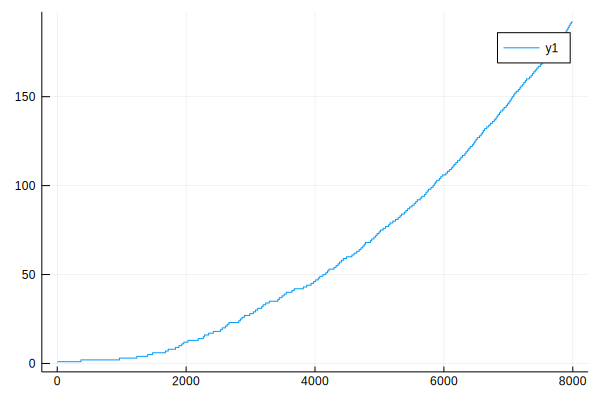

In [5]:
using Plots
plot([i for (i, x) in enumerate(hook.steps) for _ in 1:x])